# Yelp Review Sentiment Analysis Using Machine Learning

## Loading Data

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('HW4_yelp_sentiment.csv')

In [3]:
df.describe()
### As we can see, this is a fairly balaced dataset

,reviews,sentiment
count,988,988
unique,984,2
top,I won't be back.,n
freq,2,494


In [4]:
df.sentiment.value_counts()

n    494
p    494
Name: sentiment, dtype: int64

In [5]:
df['sentiment'] = df.sentiment.replace(to_replace=['n', 'p'], value=[0, 1])
### Code sentiment polarity into 1 and 0 for computational purpose

In [6]:
### Check the longest review
df['length'] = df['reviews'].str.len()
df.sort_values('length', ascending=False, inplace=True)
df

,reviews,sentiment,length
225,"As for the ""mains also uninspired.\t0\nThis is...",0,743
973,The problem I have is that they charge $11.99 ...,0,149
538,My boyfriend and I came here for the first tim...,1,148
41,Hard to judge whether these sides were good be...,0,147
784,So good I am going to have to review this plac...,1,146
...,...,...,...
468,I LOVED it!,1,11
652,Both great!,1,11
637,Great food.,1,11
570,Over rated.,0,11


In [7]:
df['reviews'][225]

'As for the "mains also uninspired.\t0\nThis is the place where I first had pho and it was amazing!!\t1\nThis wonderful experience made this place a must-stop whenever we are in town again.\t1\nIf the food isn\'t bad enough for you, then enjoy dealing with the world\'s worst/annoying drunk people.\t0\nVery very fun chef.\t1\nOrdered a double cheeseburger & got a single patty that was falling apart (picture uploaded) Yeah, still sucks.\t0\nGreat place to have a couple drinks and watch any and all sporting events as the walls are covered with TV\'s.\t1\nIf it were possible to give them zero stars, they\'d have it.\t0\nThe descriptions said "yum yum sauce" and another said "eel sauce yet another said "spicy mayo"...well NONE of the rolls had sauces on them.'

In [8]:
reviews = df['reviews']

In [9]:
import nltk

## Document Term Matrix Preparation
#### NLP: Tokenization, stemming, stopwords
#### TF-IDF transoformation

In [10]:
nltk_tokenizer = nltk.word_tokenize  ### Defiing tokenizer

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer ### TFIDF Vectorization
tfidf_vectorizer = TfidfVectorizer(
        tokenizer=nltk_tokenizer, ### Tokenization
        lowercase=True, 
        stop_words='english', ### Stopword removal
        ngram_range = (1, 2),
        max_features = 500,
        smooth_idf=True,
        sublinear_tf=True
    ).fit(df['reviews'])

In [12]:
### Vectorizing and train-test split
from sklearn.model_selection import train_test_split
def vectorize(vec):
    X_tfidf = tfidf_vectorizer.fit_transform(df["reviews"])
    Y_sentiment = df['sentiment']
    X_train, X_test, y_train, y_test = train_test_split(X_tfidf, Y_sentiment, test_size=0.2)
    print('Number of features: {}'.format(X_tfidf.shape[1]))
    print('Number of instances in train set: {}'.format(X_train.shape[0]))
    print('Number of instances in test set: {}'.format(X_test.shape[0]))
    return X_train, X_test, y_train, y_test

In [13]:
X_train, X_test, y_train, y_test = vectorize(tfidf_vectorizer)

Number of features: 500
Number of instances in train set: 790
Number of instances in test set: 198


## Using Different Machine Learning Algorithms for Sentiment Polarity Classification

### Logistic Regression

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LogisticRegression 
from sklearn.pipeline import make_pipeline

In [15]:
### Make pipeline using logistic regression with standardization
logr_pipe = make_pipeline(StandardScaler(with_mean = False), LogisticRegression(solver='lbfgs'))
### Fit and predict
logr_pipe.fit(X_train, y_train)
y_pred = logr_pipe.predict(X_test)
y_pred

array([1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1])

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit, cross_val_score, GridSearchCV

In [17]:
### Perform K-fold cross validation for logistic regression jusing AUC_ROC
k_fold = KFold(n_splits=8, shuffle = False , random_state=42)
lr = LogisticRegression(solver='lbfgs', C=1, max_iter=500)
lr.fit(X_train, y_train)
cross_validated_auc_roc = cross_val_score(lr, X_train, y_train, cv=k_fold, scoring='roc_auc')
cross_validated_auc_roc

array([0.78862126, 0.87111293, 0.85260723, 0.86503322, 0.91353383,
       0.78408163, 0.89983165, 0.89708333])

In [18]:
### Perform Grid Search for best performing model
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
bstrap = ShuffleSplit(n_splits=10, test_size=0.3, random_state=16)
grid_bstrap_lr = GridSearchCV(lr, param_grid_lr, cv=bstrap)
grid_bstrap_lr.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=16, test_size=0.3, train_size=None),
       error_score='raise-deprecating',
       estimator=LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=500, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [19]:
### Report best performing model from grid search with accuracy
print(f"Accuracy: {round(grid_bstrap_lr.best_score_*100, 2)}%")

for key, value in grid_bstrap_lr.best_params_.items():
    print(f"Hyperparameter: {key}; Value: {value}")

Accuracy: 77.38%
Hyperparameter: C; Value: 1


### Neural Network
Experiment with different ANN architectural parameters as well as model parameters

In [20]:
from keras import models
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [21]:
deep_nn = Sequential()
deep_nn.add(Dense(6, activation='relu', input_shape=(500, )))
deep_nn.add(Dense(6, activation='relu'))
deep_nn.add(Dense(1, activation='sigmoid'))
deep_nn.output_shape

(None, 1)

In [22]:
deep_nn.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 6)                 3006      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 7         
Total params: 3,055
Trainable params: 3,055
Non-trainable params: 0
_________________________________________________________________


In [23]:
### After model tuning, we found that the adam optimizer is generating the lowest cross entropy loss
deep_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [24]:
deep_nn.fit(X_train, y_train, epochs=20, batch_size=1, verbose=1)

Epoch 1/20
790/790 [==============================] - 1s 2ms/step - loss: 0.6913 - accuracy: 0.5456
Epoch 2/20
790/790 [==============================] - 1s 1ms/step - loss: 0.6334 - accuracy: 0.7557
Epoch 3/20
790/790 [==============================] - 1s 1ms/step - loss: 0.4566 - accuracy: 0.8443
Epoch 4/20
790/790 [==============================] - 1s 1ms/step - loss: 0.3217 - accuracy: 0.8797
Epoch 5/20
790/790 [==============================] - 1s 1ms/step - loss: 0.2555 - accuracy: 0.8949
Epoch 6/20
790/790 [==============================] - 1s 1ms/step - loss: 0.2180 - accuracy: 0.9089
Epoch 7/20
790/790 [==============================] - 1s 1ms/step - loss: 0.1928 - accuracy: 0.9266
Epoch 8/20
790/790 [==============================] - 1s 2ms/step - loss: 0.1746 - accuracy: 0.9291
Epoch 9/20
790/790 [==============================] - 1s 1ms/step - loss: 0.1549 - accuracy: 0.9443
Epoch 10/20
790/790 [==============================] - 1s 1ms/step - loss: 0.1467 - accuracy: 0.9456

### Decision Tree

In [25]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate, ShuffleSplit, LeaveOneOut
from sklearn import metrics
from matplotlib import pyplot as plt

In [26]:
### Build decision tree classifier and fit on data
dt = DecisionTreeClassifier(criterion='gini', max_depth=20, max_leaf_nodes=20, 
                            min_samples_leaf=1, min_samples_split=30)
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=30,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [27]:
### perform grid search to find the best parameter for decision tree
param_grid = {'criterion': ['gini', 'entropy'],
              'min_samples_split': [2, 10, 20, 30],
              'max_depth': [4, 5, 6, 10, 15, 20],
              'min_samples_leaf': [ 1, 5, 10],
              'max_leaf_nodes': [2, 5, 10, 20]}
grid = GridSearchCV(dt, param_grid, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=30,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 10, 20, 30], 'max_depth': [4, 5, 6, 10, 15, 20], 'min_samples_leaf': [1, 5, 10], 'max_leaf_nodes': [2, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [28]:
### Use random shuffling to perform grid search
bstrap = ShuffleSplit(n_splits=10, test_size=0.3, random_state=16)
grid_bstrap = GridSearchCV(dt, param_grid, cv=bstrap)
grid_bstrap.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=16, test_size=0.3, train_size=None),
       error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=30,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy'], 'min_samples_split': [2, 10, 20, 30], 'max_depth': [4, 5, 6, 10, 15, 20], 'min_samples_leaf': [1, 5, 10], 'max_leaf_nodes': [2, 5, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [29]:
print(f"Accuracy: {round(grid_bstrap.best_score_*100, 2)}%")

Accuracy: 72.49%


In [30]:
for key, value in grid_bstrap.best_params_.items():
    print(f"Hyperparameter: {key}; Value: {value}")

Hyperparameter: criterion; Value: gini
Hyperparameter: max_depth; Value: 20
Hyperparameter: max_leaf_nodes; Value: 20
Hyperparameter: min_samples_leaf; Value: 1
Hyperparameter: min_samples_split; Value: 30


In [31]:
dt_cross_validated_auc_roc = cross_val_score(dt, X_train, y_train, cv=k_fold, scoring='roc_auc')
dt_cross_validated_auc_roc

array([0.73629568, 0.79623568, 0.67893188, 0.75664452, 0.71240602,
       0.7155102 , 0.67150673, 0.76208333])

## Comparing the performance of different machine learning algorithms

In [32]:
### Here we draw AUC_ROC curve to compare the classification performance for different classifiers
from sklearn.metrics import roc_curve, auc

In [33]:
prediction = {}

In [34]:
prediction['Decision Tree'] = dt.predict(X_test)
prediction['Logistic Regression'] = lr.predict(X_test)
prediction['Deep Learning'] = deep_nn.predict(X_test)

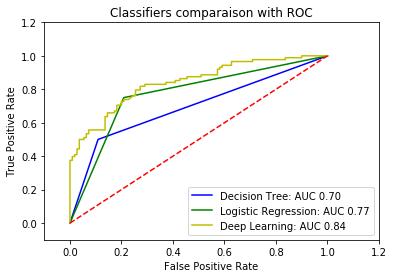

In [36]:
from sklearn.metrics import roc_curve, auc


cmp = 0
colors = ['b', 'g', 'y', 'm', 'k', 'r', 'p']
for model, predicted in prediction.items():
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predicted)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[cmp], label='%s: AUC %0.2f'% (model,roc_auc))
    cmp += 1

plt.title('Classifiers comparaison with ROC')
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [37]:
### As we can see, Deep Neural Network has the best performance

### Addition: Other data cleaning methods with NLTK

In [38]:
sample = reviews[225]
sample

### Casing
sample.lower()

### Tokenization
token = nltk.word_tokenize(sample.lower())
print(token)

### Steming
porter = nltk.PorterStemmer()
stemmed_token = [porter.stem(t) for t in token]
print(stemmed_token)

### Lemmatization
wn_Lemmatizer = nltk.WordNetLemmatizer()
lemmatized_token = [wn_Lemmatizer.lemmatize(t) for t in token]
print(lemmatized_token)

### Stop Words
stopwords = nltk.corpus.stopwords.words('english')

lemma_token_stopwords_removed = [w for w in lemmatized_token if w not in stopwords]
print(lemma_token_stopwords_removed)

import re
cleanup_re = re.compile('[^a-z]+')
cleanup_re.sub(' ', sample).strip()





['as', 'for', 'the', '``', 'mains', 'also', 'uninspired', '.', '0', 'this', 'is', 'the', 'place', 'where', 'i', 'first', 'had', 'pho', 'and', 'it', 'was', 'amazing', '!', '!', '1', 'this', 'wonderful', 'experience', 'made', 'this', 'place', 'a', 'must-stop', 'whenever', 'we', 'are', 'in', 'town', 'again', '.', '1', 'if', 'the', 'food', 'is', "n't", 'bad', 'enough', 'for', 'you', ',', 'then', 'enjoy', 'dealing', 'with', 'the', 'world', "'s", 'worst/annoying', 'drunk', 'people', '.', '0', 'very', 'very', 'fun', 'chef', '.', '1', 'ordered', 'a', 'double', 'cheeseburger', '&', 'got', 'a', 'single', 'patty', 'that', 'was', 'falling', 'apart', '(', 'picture', 'uploaded', ')', 'yeah', ',', 'still', 'sucks', '.', '0', 'great', 'place', 'to', 'have', 'a', 'couple', 'drinks', 'and', 'watch', 'any', 'and', 'all', 'sporting', 'events', 'as', 'the', 'walls', 'are', 'covered', 'with', 'tv', "'s", '.', '1', 'if', 'it', 'were', 'possible', 'to', 'give', 'them', 'zero', 'stars', ',', 'they', "'d", 'hav

's for the mains also uninspired his is the place where first had pho and it was amazing his wonderful experience made this place a must stop whenever we are in town again f the food isn t bad enough for you then enjoy dealing with the world s worst annoying drunk people ery very fun chef rdered a double cheeseburger got a single patty that was falling apart picture uploaded eah still sucks reat place to have a couple drinks and watch any and all sporting events as the walls are covered with s f it were possible to give them zero stars they d have it he descriptions said yum yum sauce and another said eel sauce yet another said spicy mayo well of the rolls had sauces on them'

In [39]:
### Tokenization,  casing, stemming and lemmatization, Stop words,

def token_case_lemma_stop_review(one_review):
    sentence = cleanup_re.sub(' ', one_review).strip() ### clean up non-words
    token = nltk.word_tokenize(sentence.lower()) ### casing and tokenization
    lemmatized_token = [wn_Lemmatizer.lemmatize(t) for t in token] ### lemmatization
    lemma_token_stopwords_removed = [w for w in lemmatized_token if w not in stopwords] ### stopwords removal
    return str(lemma_token_stopwords_removed)
    
    

### Run pre-processing function on the dataset
df['reviews_preprocessed'] = df['reviews'].apply(token_case_lemma_stop_review)

df['reviews_preprocessed']

# For this homework, you need to prepare the Document Term Matrix (DTM) using the provided text data and perform the sentiment analysis using multiple classification algorithms 

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(ngram_range = (1, 2))

tfidf_vectorizer.fit(df["reviews_preprocessed"])

tfidf_vectorizer.vocabulary_
tfidf_vectorizer.transform(df['reviews_preprocessed'])

df['tfidf']=list(tfidf_vectorizer.transform(df['reviews_preprocessed']))

df['tfidf']

225      (0, 6215)\t0.07717624375976634\n  (0, 6214)\...
973      (0, 5663)\t0.2094820995538818\n  (0, 5556)\t...
538      (0, 5507)\t0.23209465428906134\n  (0, 5506)\...
41       (0, 6057)\t0.2141859074527099\n  (0, 6056)\t...
784      (0, 5538)\t0.2082966990472628\n  (0, 5536)\t...
                             ...                        
468                                                     
652      (0, 3724)\t0.6938197225801094\n  (0, 3722)\t...
637      (0, 4349)\t0.7219572554819609\n  (0, 4346)\t...
570      (0, 5683)\t0.5881748032073112\n  (0, 5682)\t...
163                                                     
Name: tfidf, Length: 988, dtype: object

In [40]:
df

,reviews,sentiment,length,reviews_preprocessed,tfidf
225,"As for the ""mains also uninspired.\t0\nThis is...",0,743,"['main', 'also', 'uninspired', 'place', 'first...","(0, 6215)\t0.07717624375976634\n (0, 6214)\..."
973,The problem I have is that they charge $11.99 ...,0,149,"['problem', 'charge', 'sandwich', 'bigger', 'u...","(0, 5663)\t0.2094820995538818\n (0, 5556)\t..."
538,My boyfriend and I came here for the first tim...,1,148,"['boyfriend', 'came', 'first', 'time', 'recent...","(0, 5507)\t0.23209465428906134\n (0, 5506)\..."
41,Hard to judge whether these sides were good be...,0,147,"['ard', 'judge', 'whether', 'side', 'good', 'g...","(0, 6057)\t0.2141859074527099\n (0, 6056)\t..."
784,So good I am going to have to review this plac...,1,146,"['good', 'going', 'review', 'place', 'twice', ...","(0, 5538)\t0.2082966990472628\n (0, 5536)\t..."
...,...,...,...,...,...
468,I LOVED it!,1,11,[],
652,Both great!,1,11,"['oth', 'great']","(0, 3724)\t0.6938197225801094\n (0, 3722)\t..."
637,Great food.,1,11,"['reat', 'food']","(0, 4349)\t0.7219572554819609\n (0, 4346)\t..."
570,Over rated.,0,11,"['ver', 'rated']","(0, 5683)\t0.5881748032073112\n (0, 5682)\t..."
